**Task # 2 - To Explore Supervised Machine Learning**

In this regression task we will predict the percentage of
marks that a student is expected to score based upon the
number of hours they studied.This is a simple linear
regression task as it involves just two variables.

Data Set Link: http://bit.ly/w-data 

In [7]:
#importing libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

#reading data 
data = pd.read_csv("http://bit.ly/w-data")

In [10]:
#dataset shape
print(data.shape)

(25, 2)


In [12]:
#Checking for null value
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [8]:
print("First Ten Entries of dataset:")
data.head(10)

First Ten Entries of dataset:


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [15]:
#Checking for corelation between two variables
s=data.corr()
s

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


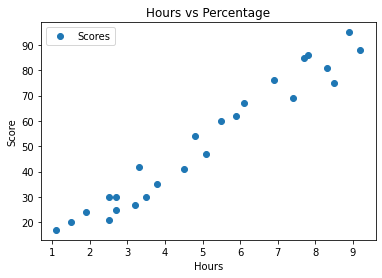

In [6]:
# Plotting the  scores
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours')  
plt.ylabel('Score')  
plt.show()

In [16]:
#feature selection
X = data.iloc[:, :-1].values  
Y = data.iloc[:, 1].values

In [17]:
#spliting data for training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=7)

In [26]:
#Training the Algorithm
from sklearn.linear_model import LinearRegression  
mod = LinearRegression()  
mod.fit(X_train, Y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

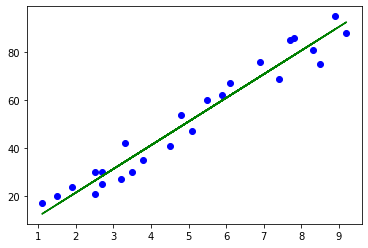

In [27]:
# Plotting the regression line
line = mod.coef_*X+mod.intercept_
plt.scatter(X, Y,c='blue')
plt.plot(X, line,c='Green');
plt.show()

In [30]:
# Predicting the scores
Y_pred = mod.predict(X_test) 
Y_pred

array([52.07185629, 16.52994012, 59.97005988, 34.3008982 , 33.31362275,
       49.11002994, 28.37724551, 26.40269461])

In [31]:
#Comparing Actual vs Predicted
d = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})  
print(d)

   Actual  Predicted
0      47  52.071856
1      20  16.529940
2      62  59.970060
3      42  34.300898
4      27  33.313623
5      54  49.110030
6      25  28.377246
7      30  26.402695


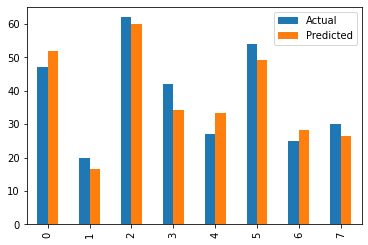

In [54]:
#ploting Actual and predicted
d.plot(kind='bar')

In [51]:
#testing the data
hrs = 9.25
own_pred = mod.predict([[hrs]])
print("No of Hours studied :", format(hrs))
print("Predicted score :",format(own_pred[0]))

No of Hours studied : 9.25
Predicted score : 93.0437874251497


In [52]:
#Evaluation of model accuracy
from sklearn import metrics
print("MAE :",metrics.mean_absolute_error(Y_test, Y_pred))
print("MSE :",metrics.mean_squared_error(Y_test, Y_pred))
print("RMSE :",np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

MAE : 4.556137724550894
MSE : 23.660237487226112
RMSE : 4.864179014718323
